In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data = data[data.shot_made_flag.notnull()].reset_index()

In [3]:
data.head()

,index,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
1,2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
2,3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
3,4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
4,5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [4]:
data.columns

Index(['index', 'action_type', 'combined_shot_type', 'game_event_id',
       'game_id', 'lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining',
       'period', 'playoffs', 'season', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup',
       'opponent', 'shot_id'],
      dtype='object')

### Graphs start here

Most common types of shots that he scored

In [5]:
set(data['combined_shot_type'])

{'Bank Shot', 'Dunk', 'Hook Shot', 'Jump Shot', 'Layup', 'Tip Shot'}

In [6]:
shots_scored = data.loc[data['shot_made_flag'] == 1]

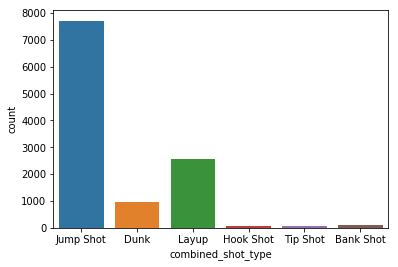

In [7]:
ax = sns.countplot(x='combined_shot_type', data=shots_scored)
plt.show()

Most common area on the court where he scored

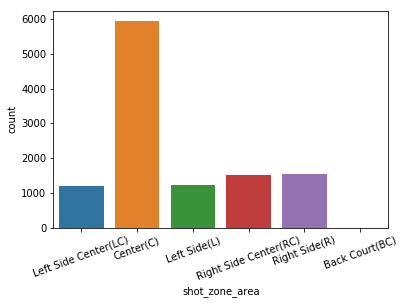

In [8]:
ax = sns.countplot(x='shot_zone_area', data=shots_scored)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.show()

Most common area he tried to score in when there was very little time remaining

First, look at 3 minutes remaining

In [9]:
last_shots_3 = data.loc[data['minutes_remaining'] <= 3]

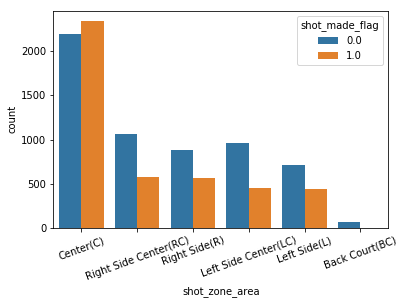

In [10]:
ax = sns.countplot(x='shot_zone_area', hue='shot_made_flag', data=last_shots_3,
                   order=last_shots_3['shot_zone_area'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.show()

Now, look at 1 possesion remaining - similar to 3 minutes

In [11]:
last_shots_1 = data.loc[data['seconds_remaining'] <= 24]

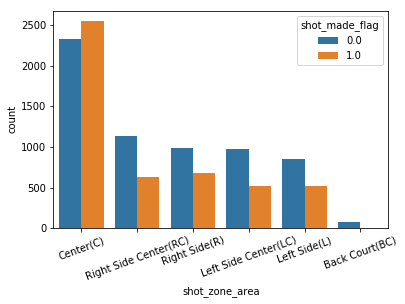

In [12]:
ax = sns.countplot(x='shot_zone_area', hue='shot_made_flag', data=last_shots_1, 
                   order=last_shots_1['shot_zone_area'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.show()

Points scored per season

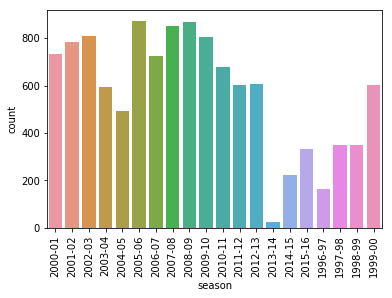

In [13]:
ax = sns.countplot(x='season', data=shots_scored)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

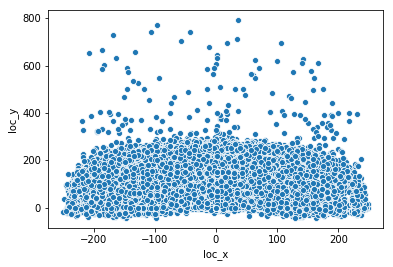

In [14]:
ax = sns.scatterplot(x="loc_x", y="loc_y", data=data)
plt.show()